<a href="https://colab.research.google.com/github/JMGErie/Module-24-Final-Capstone-Project/blob/main/steel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import os
import graphviz as graphviz
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from google.colab import data_table
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import xgboost as xgb
import sklearn.base
from sklearn.inspection import PartialDependenceDisplay
#!pip install shap==0.23.0
#!pip install -I shap
#!pip install _fit_context

import shap

In [2]:
#accessing google drive and downloading the file:

# Import necessary libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create GoogleDrive object
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# downloading the file from Google Drive using its file ID
file_id = '12vGN-ovDk8-tdTDeQJOGnVZ9D2RdtbBW'  # Replace with your file ID
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('steel_strength.csv')

In [3]:
# loading the downloaded CSV file into a Pandas DataFrame
steel = pd.read_csv('steel_strength.csv')

In [4]:
#visializing the df
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   formula           312 non-null    object 
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        303 non-null    float64
dt

In [5]:
steel[["yield strength", "tensile strength", "elongation"]].describe()


,yield strength,tensile strength,elongation
count,312.000000,312.000000,303.000000
mean,1420.998397,1641.653205,14.007261
std,301.894169,346.475179,5.095974
min,1005.900000,1019.000000,2.000000
25%,1219.475000,1338.125000,10.800000
50%,1344.200000,1666.300000,14.800000
75%,1576.075000,1899.950000,17.300000
max,2510.300000,2570.000000,35.000000


<ipython-input-6-ecbf0ac76bed>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(steel[column])


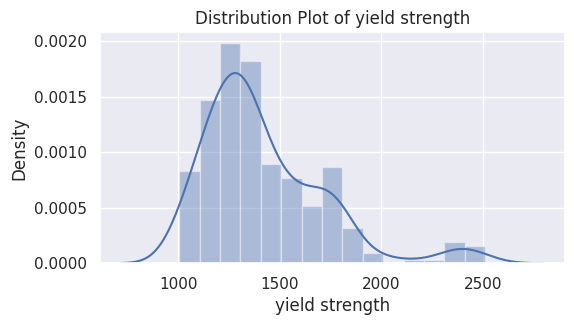

<ipython-input-6-ecbf0ac76bed>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(steel[column])


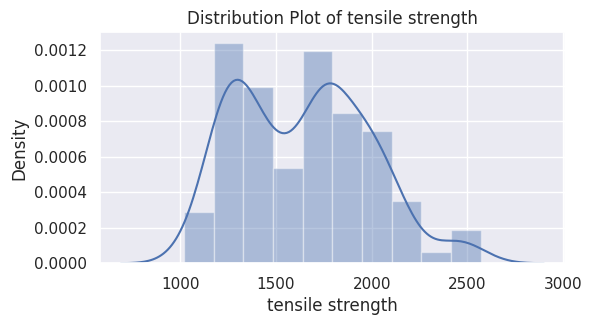

<ipython-input-6-ecbf0ac76bed>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(steel[column])


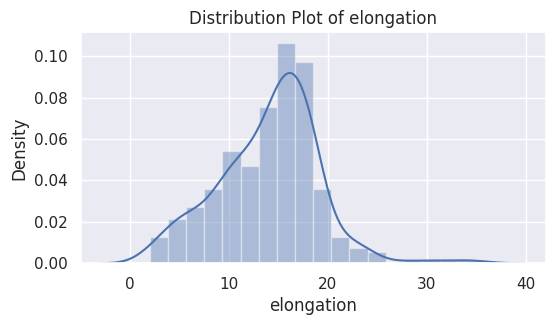

In [6]:
distributions = ['yield strength', 'tensile strength', 'elongation']
for column in distributions:
    plt.figure(figsize=(6, 3))
    sns.distplot(steel[column])
    plt.title(f'Distribution Plot of {column}')
    plt.show()

In [7]:
#creating visualizing dataset
#sns.pairplot(steel);
#plt.title('Pair Plot of Steel')
#plt.savefig("Pair Plot of Steel")

In [8]:
# Set the "formula" column as the index
steel.set_index("formula", inplace=True)

In [9]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185 to Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0.0786Mo0.00284V0.000765Nb0.0000600Co0.0369Al0.000619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   c                 312 non-null    float64
 1   mn                312 non-null    float64
 2   si                312 non-null    float64
 3   cr                312 non-null    float64
 4   ni                312 non-null    float64
 5   mo                312 non-null    float64
 6   v                 312 non-null    float64
 7   n                 312 non-null    float64
 8   nb                312 non-null    float64
 9   co                312 non-null    float64
 10  w                 312 non-null    float64
 11  al                312 non-null    float64
 12  ti                312 non-null    float6

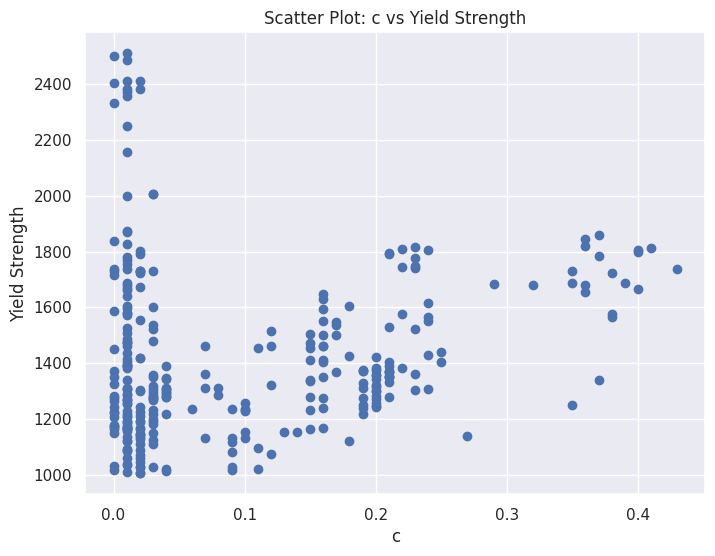

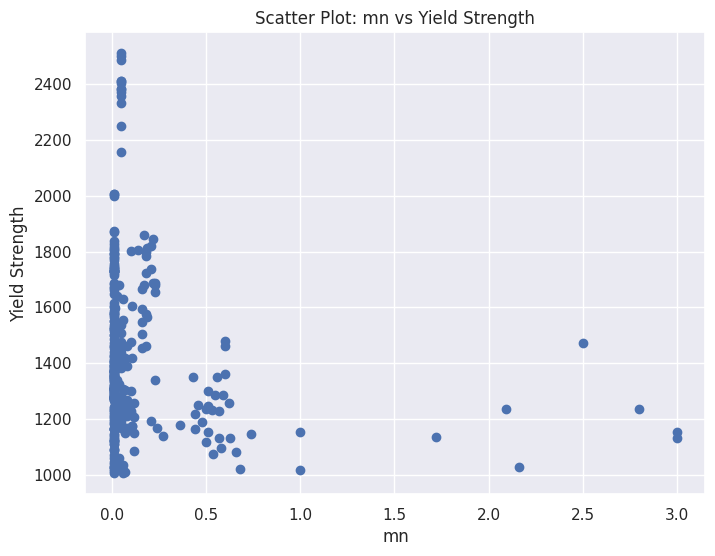

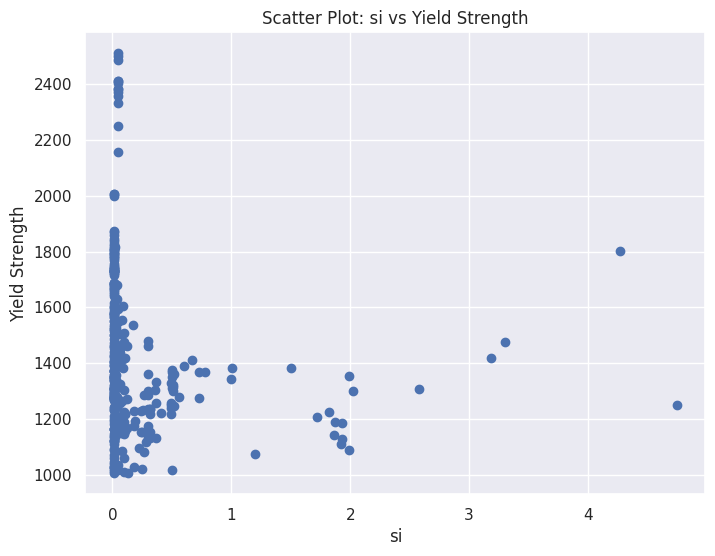

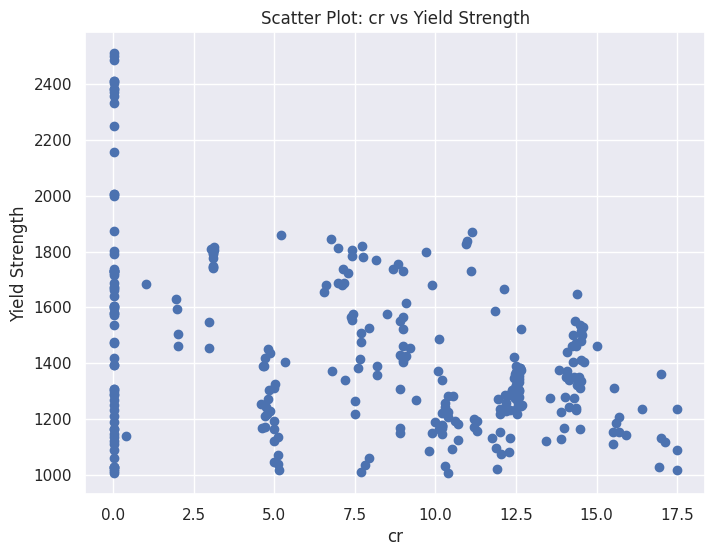

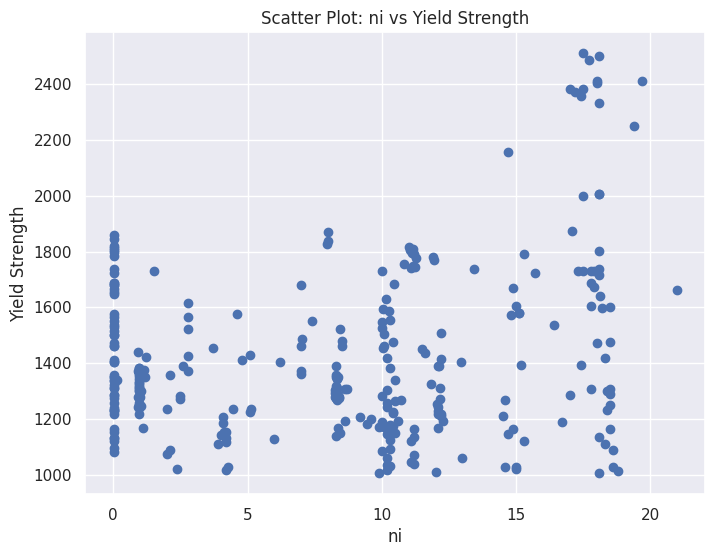

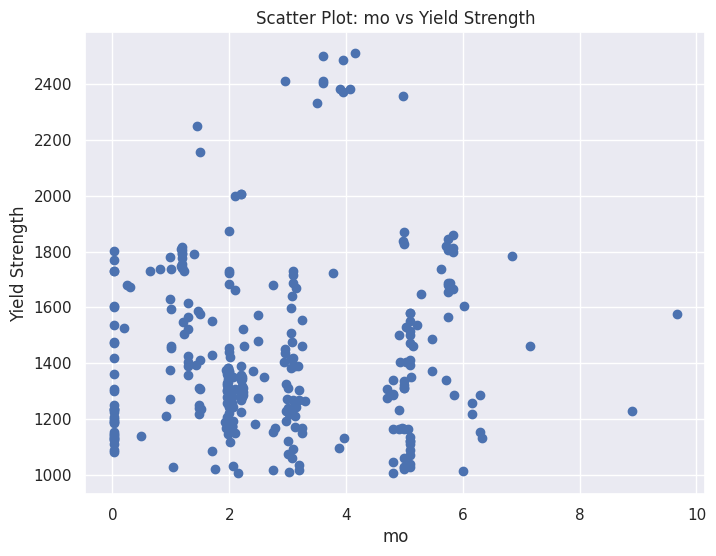

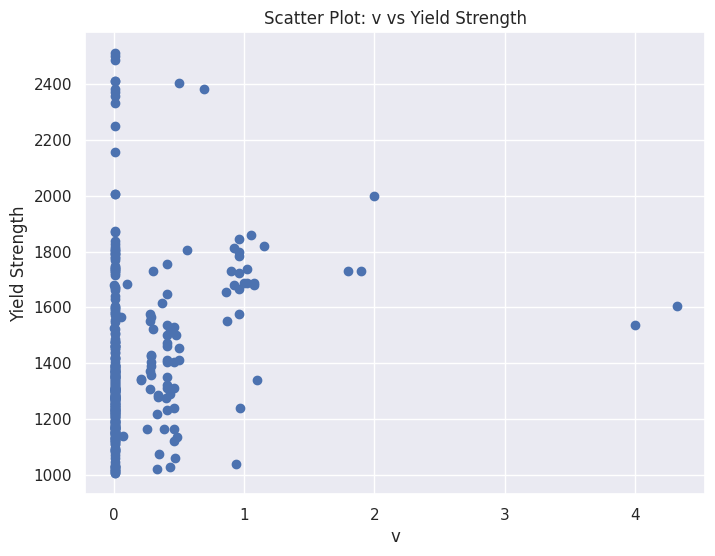

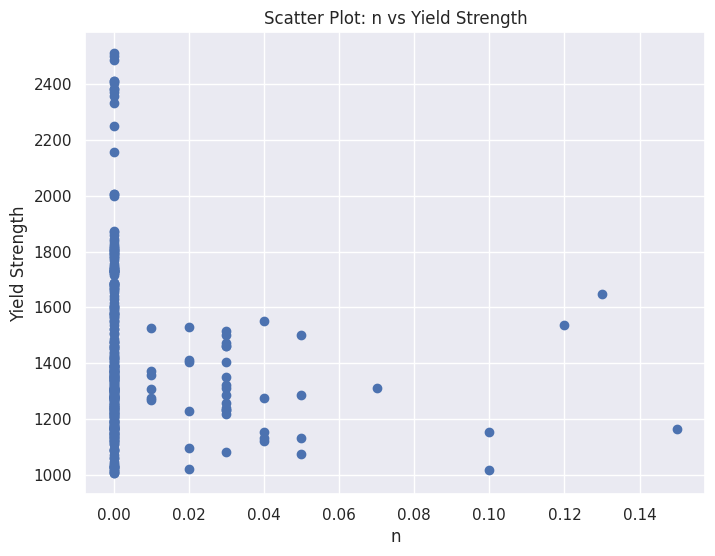

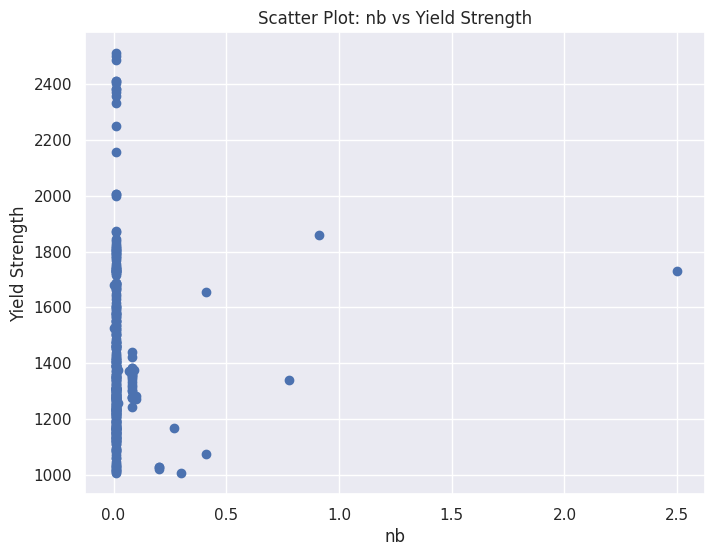

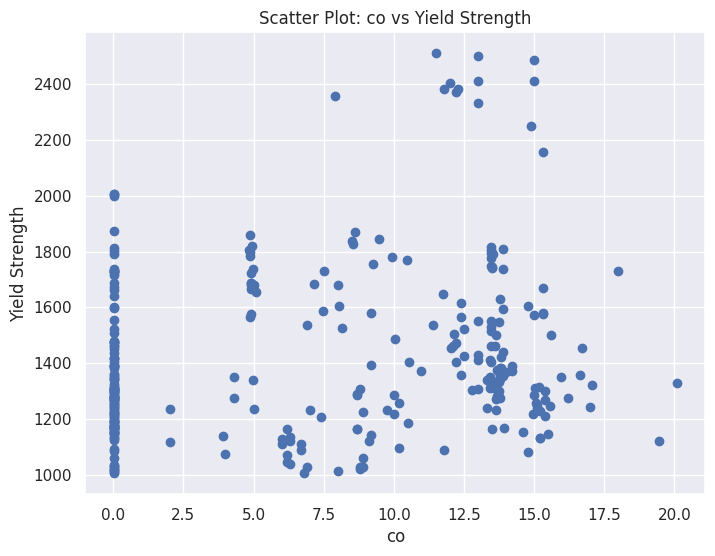

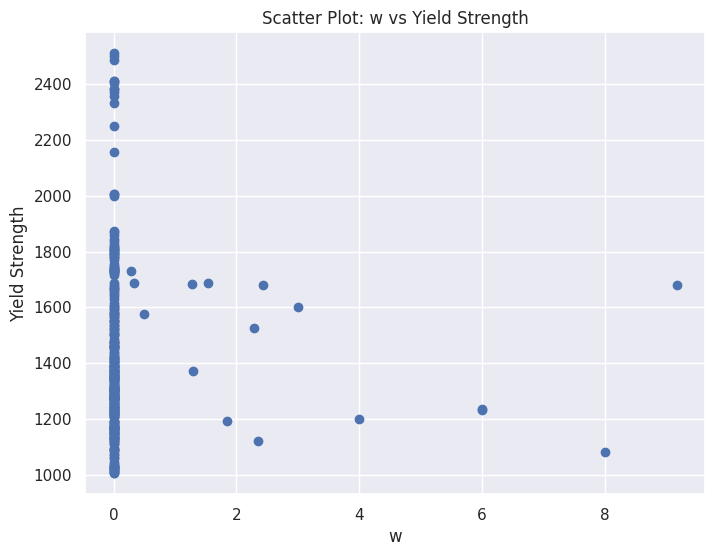

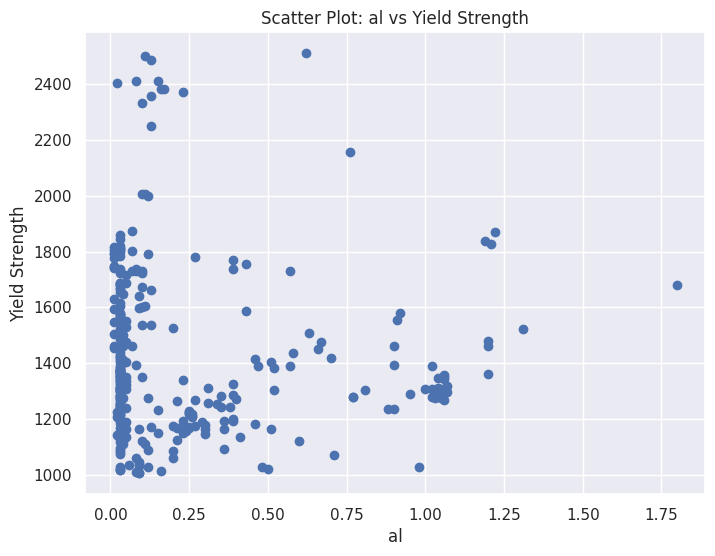

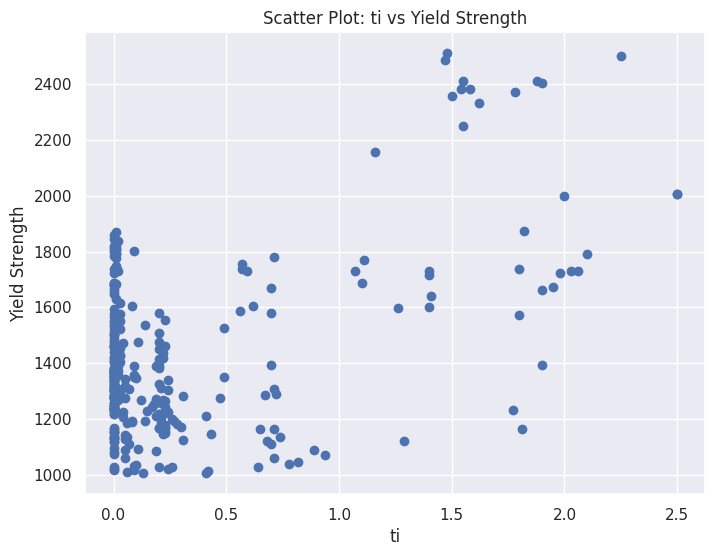

In [10]:
columns = steel.columns[:-3]  # All columns except 'yield strength'

for col in columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(steel[col], steel['yield strength'])
    plt.title(f'Scatter Plot: {col} vs Yield Strength')
    plt.xlabel(col)
    plt.ylabel('Yield Strength')
    plt.grid(True)
    plt.show()


In [11]:
# Fill NaN values with zeroes in specific columns
columns_to_fill = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']
steel[columns_to_fill] = steel[columns_to_fill].fillna(0)

#Creating a column for iron (fe)
# List of columns to subtract from 100
columns_to_subtract = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']

# Create the "fe" column by subtracting values from 100
steel["fe"] = 100 - steel[columns_to_subtract].sum(axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

#seperating the features into X and target into y and scaling X
X = steel.drop(labels=["yield strength", "tensile strength", "elongation"], axis=1)

y = steel["yield strength"]

# Fit the scaler on the data and transform the features
X_scaled = scaler.fit_transform(X)

# Display the scaled DataFrame
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185 to Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0.0786Mo0.00284V0.000765Nb0.0000600Co0.0369Al0.000619
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c       312 non-null    float64
 1   mn      312 non-null    float64
 2   si      312 non-null    float64
 3   cr      312 non-null    float64
 4   ni      312 non-null    float64
 5   mo      312 non-null    float64
 6   v       312 non-null    float64
 7   n       312 non-null    float64
 8   nb      312 non-null    float64
 9   co      312 non-null    float64
 10  w       312 non-null    float64
 11  al      312 non-null    float64
 12  ti      312 non-null    float64
 13  fe      312 non-null    float64
dtypes: float64(14)
memory usage: 44.7+ KB


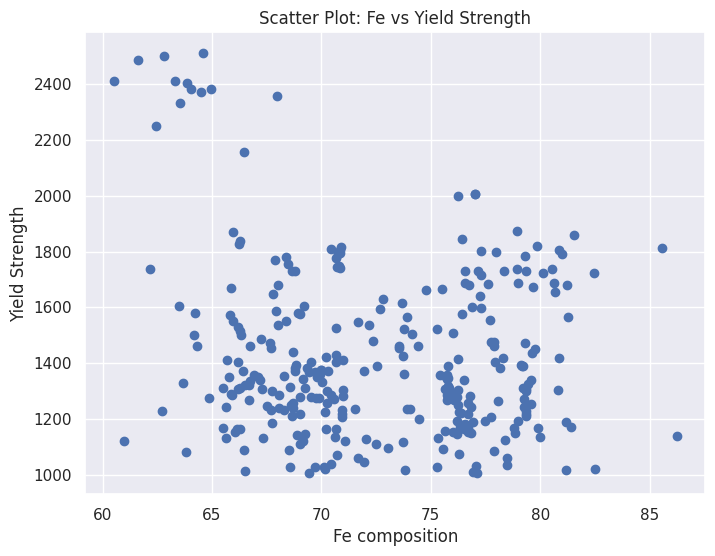

In [12]:
plt.figure(figsize=(8, 6))
import matplotlib.pyplot as plt
plt.scatter(X["fe"], steel['yield strength'])
plt.title('Scatter Plot: Fe vs Yield Strength')
plt.xlabel('Fe composition')
plt.ylabel('Yield Strength')
plt.grid(True)
plt.show()

In [14]:
y.info()

<class 'pandas.core.series.Series'>
Index: 312 entries, Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185 to Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0.0786Mo0.00284V0.000765Nb0.0000600Co0.0369Al0.000619
Series name: yield strength
Non-Null Count  Dtype  
--------------  -----  
312 non-null    float64
dtypes: float64(1)
memory usage: 13.0+ KB


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Random Forest Regression model
# Train the Random Forest Regression model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

# Make predictions on the test set
rfr_predictions = rfr_model.predict(X_test)

# Evaluate the model
rfr_mse = mean_squared_error(y_test, rfr_predictions)
print("Random Forrest Regressor Mean Squared Error:", rfr_mse)


Random Forrest Regressor Mean Squared Error: 11919.871524698427


In [17]:
# adding a prediction column using X to the steel dataframe
steel["rfr_ys_preds"] =rfr_model.predict(X)

In [18]:
# creating a column for the percentage of the relative error for each row
steel["rfr_ys_preds_%"] = abs(100 * (steel["rfr_ys_preds"] - steel["yield strength"]) / steel["yield strength"])


In [20]:
# Create a DataFrame to store predictions with absolute error less or equal to 10%
good_ys_preds_rfr = steel["rfr_ys_preds_%"] <= 10

# Count the number of "Good" predictions
good_count = good_ys_preds_rfr.value_counts()[True]

# Calculate the percentage of "Good" predictions
rfr_percentage_good = (good_count / len(steel["rfr_ys_preds_%"])) * 100

print("The percentage of Yield Strength Random Forrest Predictions within 10% of Actual value is:", rfr_percentage_good)


The percentage of Yield Strength Random Forrest Predictions within 10% of Actual value is: 93.58974358974359


In [22]:
# Getting feature importances from the Random Forrest Model
feature_importances = rfr_model.feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

c: 0.128
mn: 0.062
si: 0.071
cr: 0.045
ni: 0.033
mo: 0.054
v: 0.011
n: 0.003
nb: 0.007
co: 0.053
w: 0.002
al: 0.059
ti: 0.406
fe: 0.066


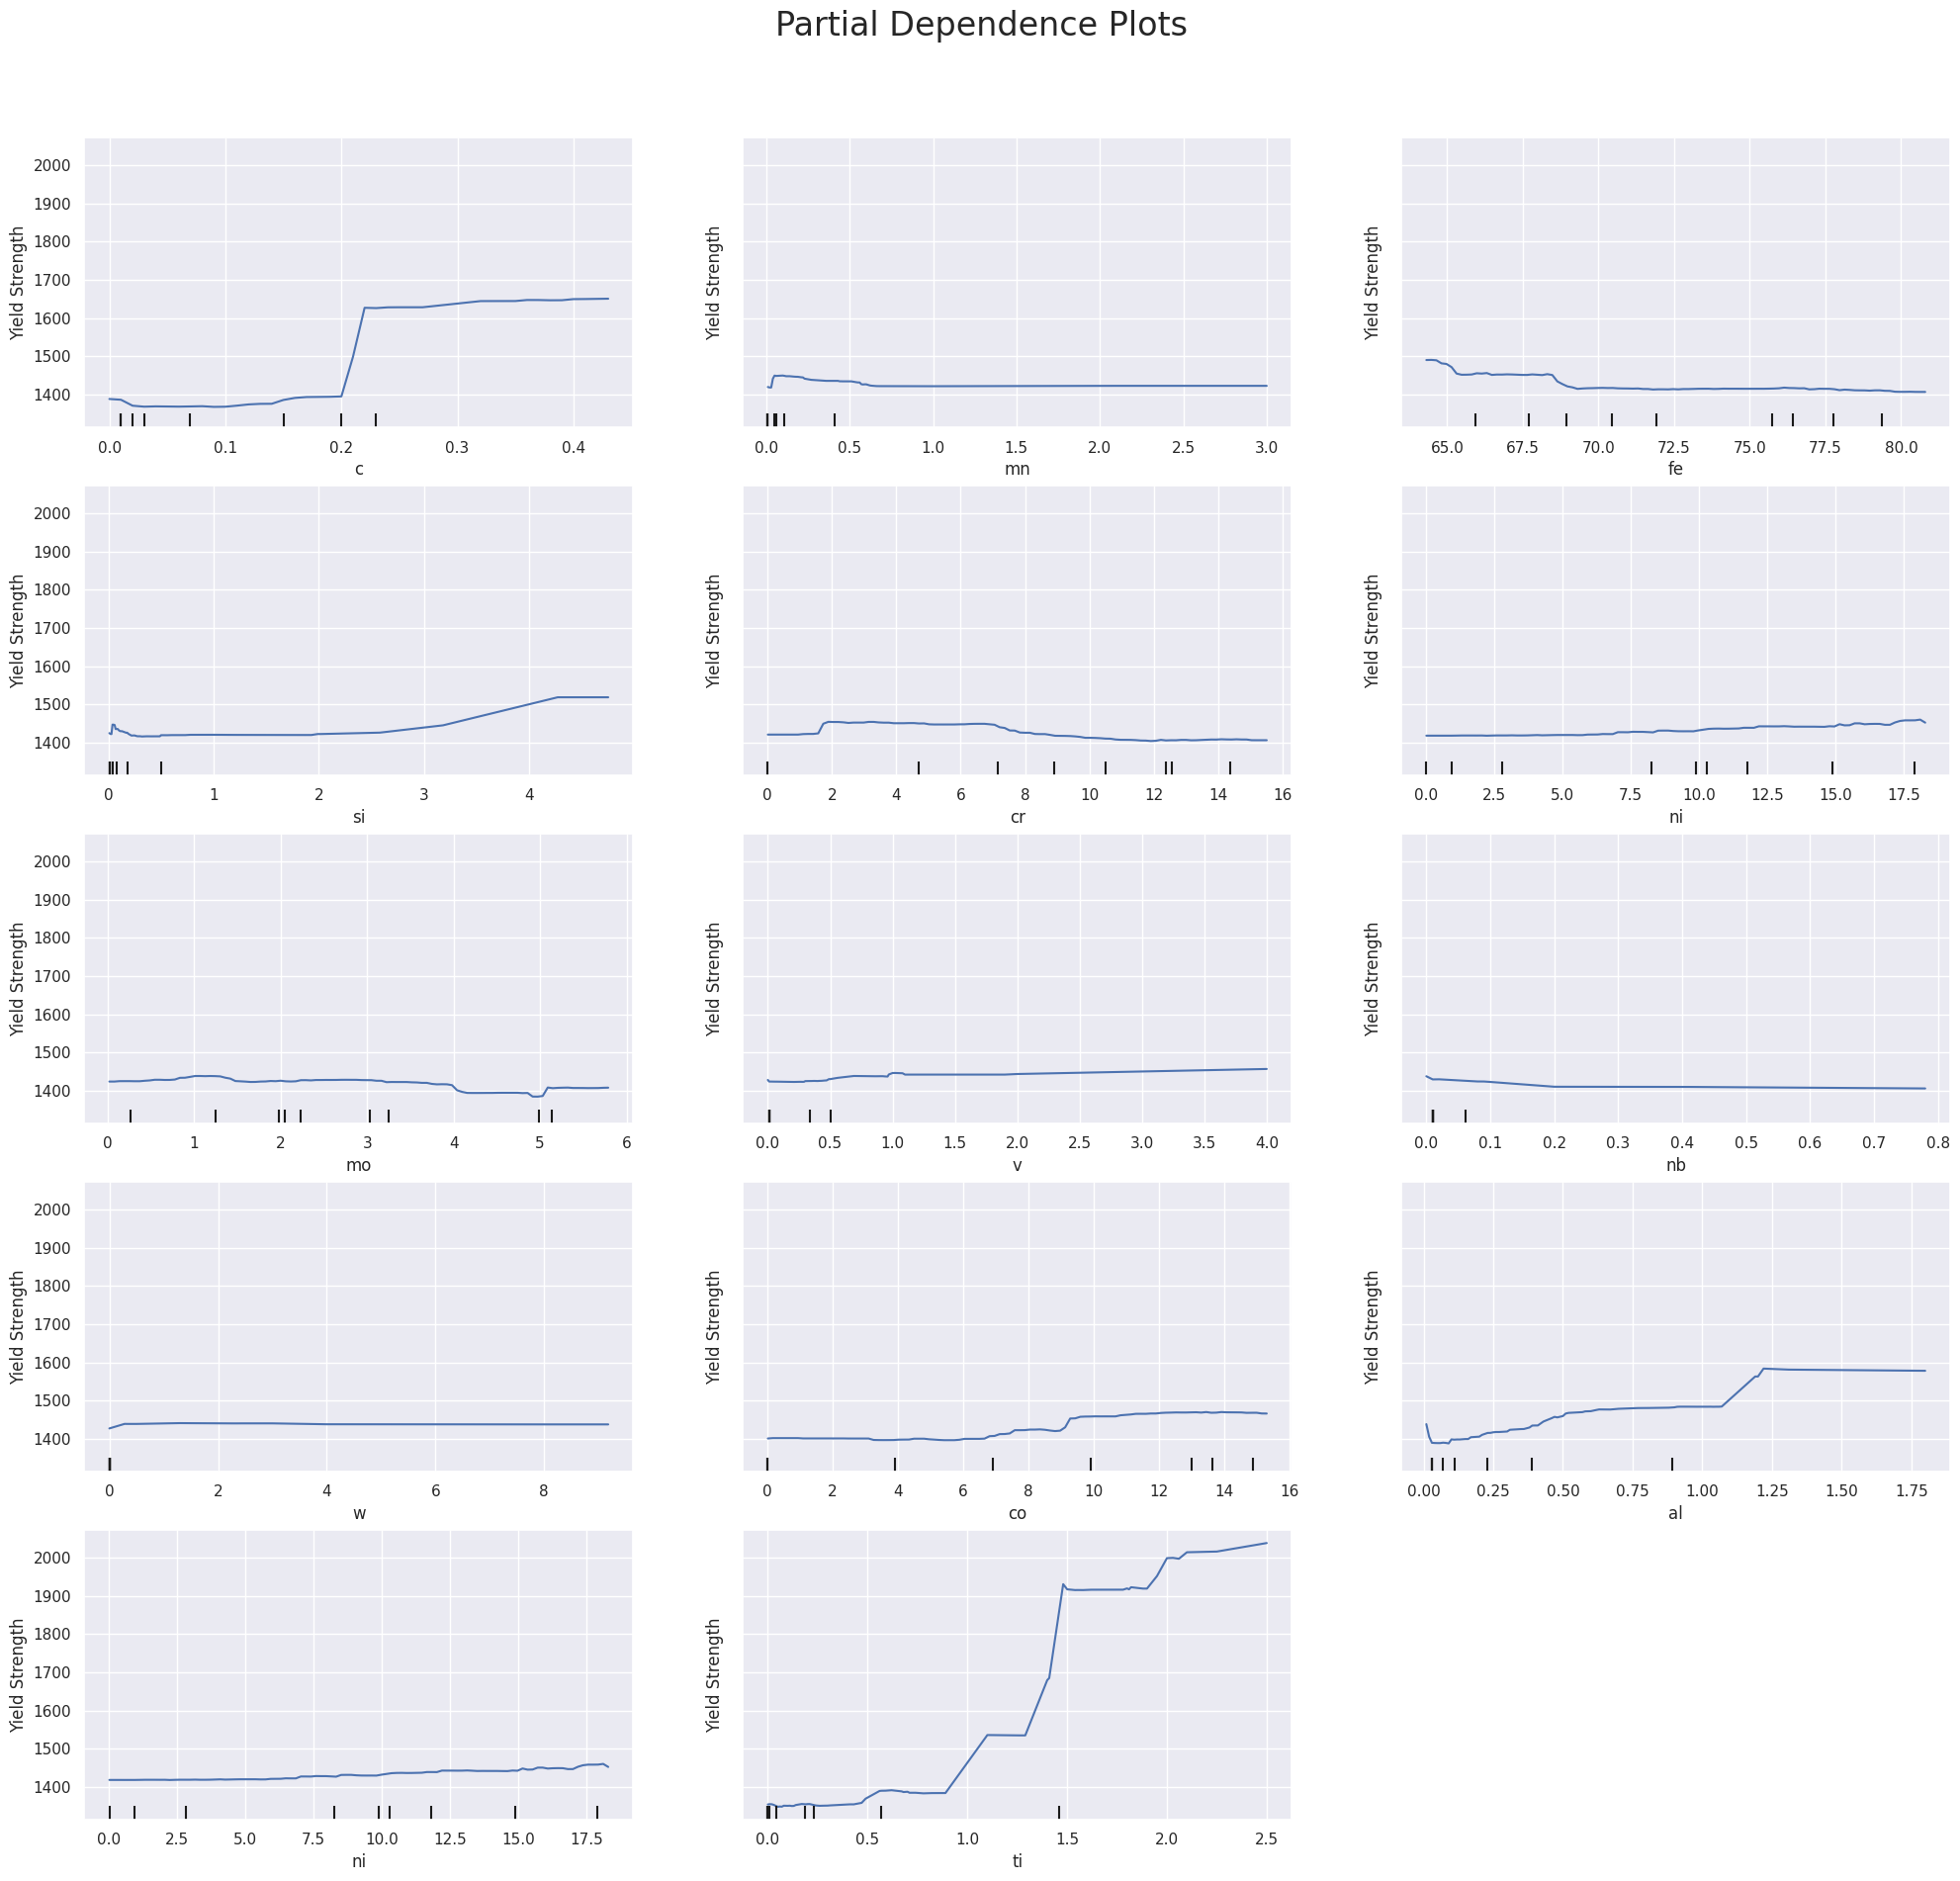

In [67]:
# Creating Partial Dependence Plots to understand the relationship between the Yield Strength and the features

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(20, 20))
# Create a partial dependence plot for specific features
disp = PartialDependenceDisplay.from_estimator(
    rfr_model,
    X_train,
    features=['c', 'mn', 'fe', 'si', 'cr', 'ni', 'mo', 'v', 'nb', 'w', 'co', 'al', 'ni', 'ti'],
    kind="average",
    ax = ax,
)

# Set the title for the overall figure
fig.suptitle("Partial Dependence Plots", fontsize=24)

# Iterate over each ax in the PartialDependenceDisplay object to set the Y-axis label
for row in disp.axes_:
    for ax in row:
        if ax is not None:
            ax.set_ylabel("Yield Strength")

# Adjust layout to make room for the overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


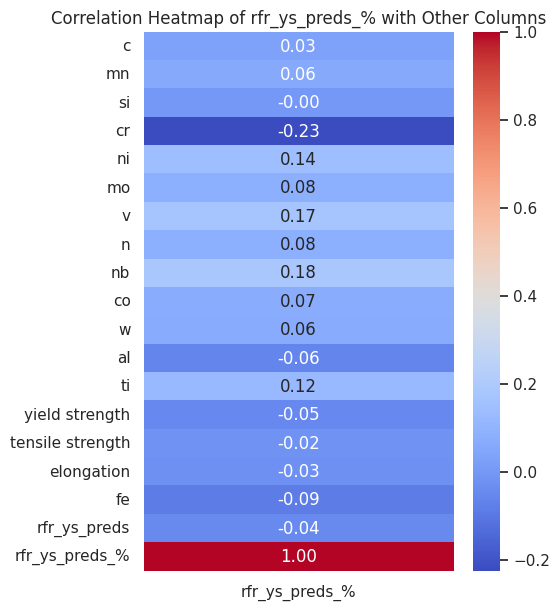

In [24]:
# Calculate the correlation matrix
rfr_corr = steel.corr()

# Plot the heatmap
plt.figure(figsize=(5, 7))
sns.heatmap(rfr_corr[['rfr_ys_preds_%']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of rfr_ys_preds_% with Other Columns')
plt.show()



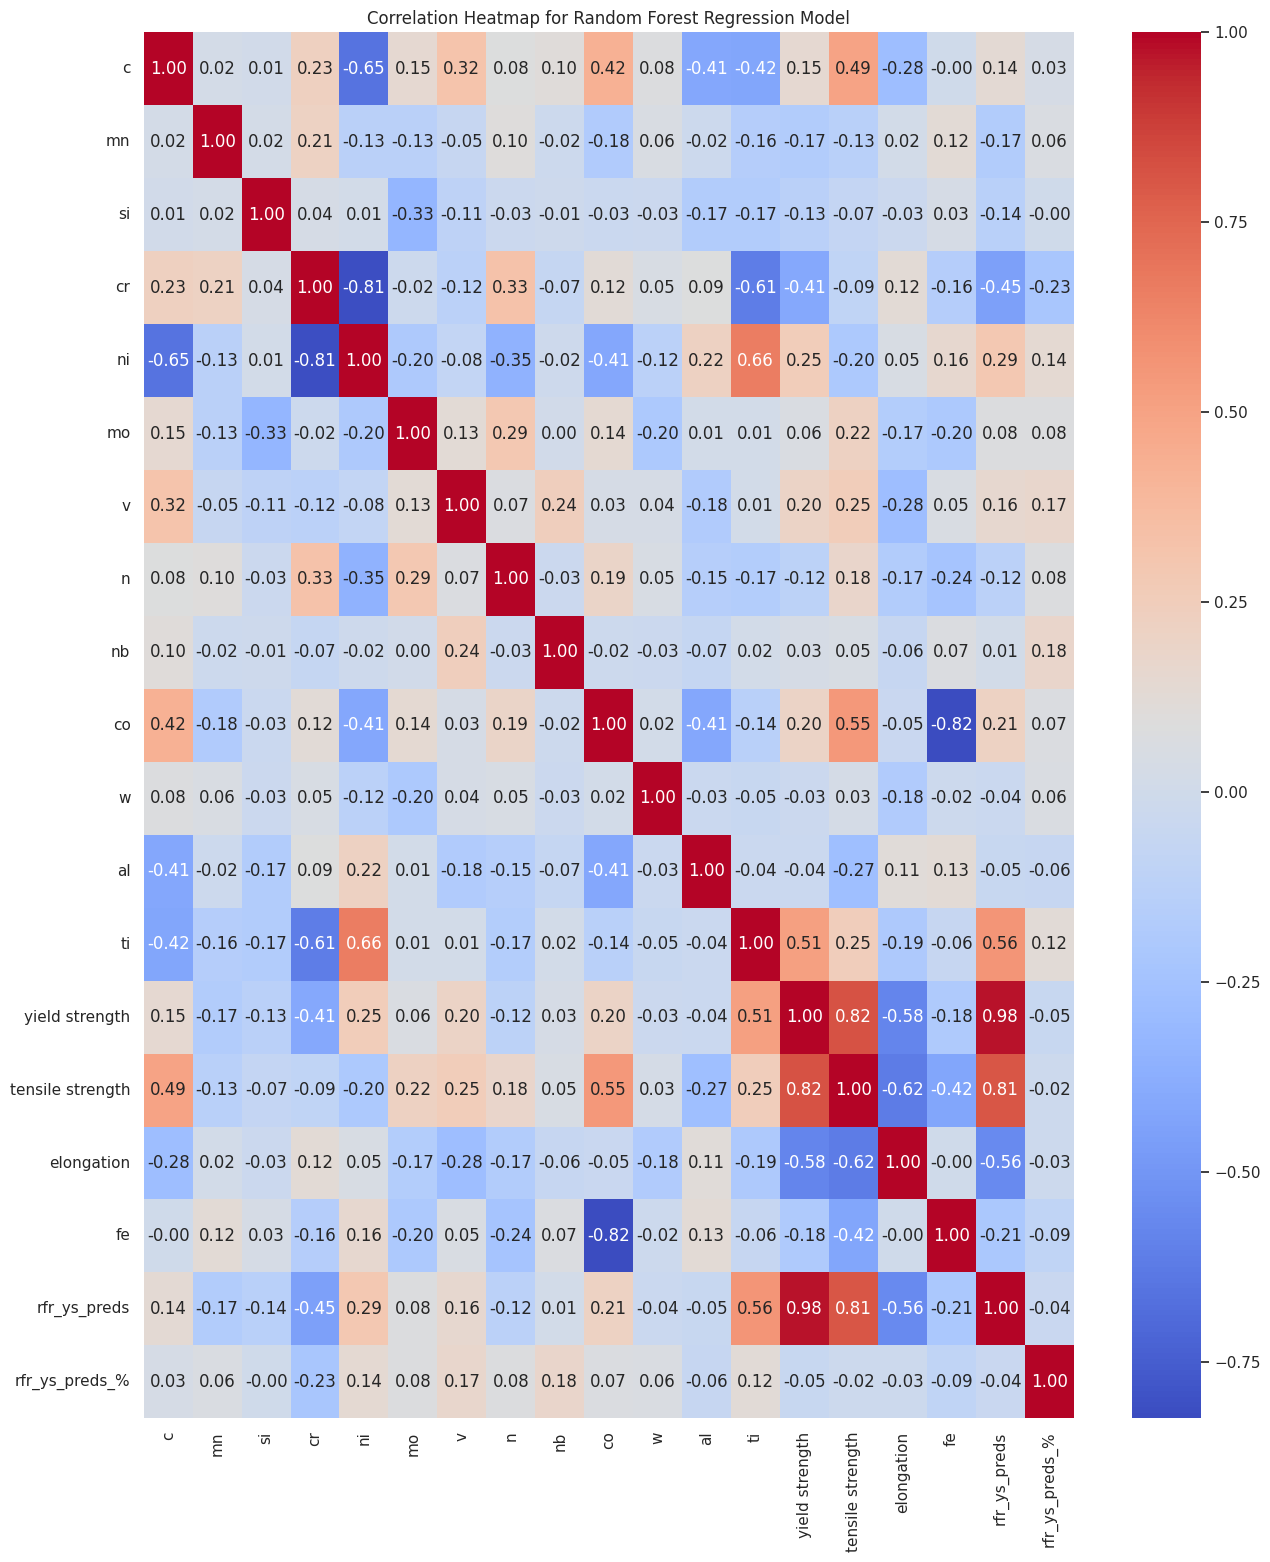

In [25]:
# Plot the heatmap for the entire correlation matrix
plt.figure(figsize=(15, 18))
sns.heatmap(rfr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Random Forest Regression Model')
plt.show()



In [26]:
# creating a Random Forrest Regressor  GridSearch in order to improve results:

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [5, 50, 100],
    'max_depth': [None, 4, 8, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': [1, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest Regression model
rfr_gs_model = RandomForestRegressor()

# Create a GridSearchCV instance
grid_search_rfr = GridSearchCV(rfr_gs_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV instance
grid_search_rfr.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_rfr.best_params_)
print("Best Score (Negative MSE):", grid_search_rfr.best_score_)

# Make predictions on the test set using the best model from grid search
best_model_rfr_gs = grid_search_rfr.best_estimator_
rfr_gs_predictions = best_model_rfr_gs.predict(X_test)

# Evaluate the best model
rfr_gs_mse = mean_squared_error(y_test, rfr_gs_predictions)
print("Grid Search CV Random Forest Regressor Mean Squared Error (Test set):", rfr_gs_mse)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Negative MSE): -21101.09594842973
Grid Search CV Random Forest Regressor Mean Squared Error (Test set): 11652.939349206372


In [30]:
# creating columns for the model predictions and the percent error
steel["rfr_ys_gs_preds"] = best_model_rfr_gs.predict(X)
steel["rfr_ys_gs_preds_%"] = abs(100 * (steel["rfr_ys_gs_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to 10%
good_ys_gs_preds_rfr = steel["rfr_ys_gs_preds_%"] <= 10

# Count the number of "Good" predictions
good_count = good_ys_gs_preds_rfr.value_counts()[True]

# Calculate the percentage of "Good" predictions
gs_rfr_percentage_good = (good_count / len(steel["rfr_ys_gs_preds_%"])) * 100

print("The percentage of Yield Strength Grid Search RFR Predictions within 10% of Actual value is:", gs_rfr_percentage_good)


The percentage of Yield Strength Grid Search RFR Predictions within 10% of Actual value is: 94.23076923076923


In [31]:
print("Percentage GridSearch CV improved the Random Forest Regressor model by:", gs_rfr_percentage_good - rfr_percentage_good)

Percentage GridSearch CV improved the Random Forest Regressor model by: 0.6410256410256352


In [32]:
# Attempting a Linear Regressor

# Define the parameter grid for Linear Regression with Polynomial Features and Ridge Regularization on the Steel DF
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'polynomialfeatures__interaction_only': [True, False],
    'polynomialfeatures__include_bias': [True, False],
    'ridge__alpha': [0.01, 0.1, 1.0],
    'ridge__solver': ['auto', 'svd', 'cholesky'],
    'ridge__random_state': [42]
}

# Create a pipeline with Polynomial Features and Ridge Regression
lr_poly_reg_model = make_pipeline(PolynomialFeatures(), Ridge())

# Create a GridSearchCV instance
grid_search_lr_poly_reg = GridSearchCV(lr_poly_reg_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV instance
grid_search_lr_poly_reg.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_lr_poly_reg.best_params_)
print("Best Score (Negative MSE):", grid_search_lr_poly_reg.best_score_)

# Make predictions on the test set using the best model from grid search
best_model_lr_poly_reg = grid_search_lr_poly_reg.best_estimator_
lr_poly_reg_predictions = best_model_lr_poly_reg.predict(X_test)

# Evaluate the best model
lr_poly_reg_mse = mean_squared_error(y_test, lr_poly_reg_predictions)
print("Grid Search CV Linear Regressor with Polynomial Features and Ridge Regularization Mean Squared Error (Test set):", lr_poly_reg_mse)


Best Parameters: {'polynomialfeatures__degree': 1, 'polynomialfeatures__include_bias': True, 'polynomialfeatures__interaction_only': True, 'ridge__alpha': 0.1, 'ridge__random_state': 42, 'ridge__solver': 'svd'}
Best Score (Negative MSE): -48656.46692222369
Grid Search CV Linear Regressor with Polynomial Features and Ridge Regularization Mean Squared Error (Test set): 71404.69990276481


In [33]:
# creating a columns for the predictions and the percent error
steel["lr_ys_gs_preds"] = best_model_lr_poly_reg.predict(X)
steel["lr_ys_gs_preds_%"] = abs(100 * (steel["lr_ys_gs_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to 10%
good_ys_gs_preds_lr = steel["lr_ys_gs_preds_%"] <= 10

# Count the number of "Good" predictions
good_count = good_ys_gs_preds_lr.value_counts()[True]

# Calculate the percentage of "Good" predictions
percentage_good = (good_count / len(steel["lr_ys_gs_preds_%"])) * 100

print("The percentage of Yield Strength Grid Search Poly Regressor Predictions within 10% of Actual value is:", percentage_good)


The percentage of Yield Strength Grid Search Poly Regressor Predictions within 10% of Actual value is: 64.1025641025641


In [34]:
# Trying to predict Yield Strength using Deep Neural Network.

# Define the neural network architecture

# Define the neural network architecture with L2 regularization
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])


# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
nn_mse = nn_model.evaluate(X_test, y_test)
# Generate predictions using the trained model
nn_predictions = nn_model.predict(X_test)
print("Neural Network Mean Squared Error:", nn_mse)


2/2 [==============================] - 0s 5ms/step
Neural Network Mean Squared Error: 55230.984375


In [37]:
# Generate predictions using the trained model using X_scaled
steel['nn_ys_preds'] = nn_model.predict(X)

10/10 [==============================] - 0s 2ms/step


In [39]:
# creating a column for the percentage of the relative error for each row
steel["nn_ys_preds_%"] = abs(100 * (steel["nn_ys_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to 10%
good_ys_preds_nn = steel["nn_ys_preds_%"] <= 10

# Count the number of "Good" predictions
good_count_nn = good_ys_preds_nn.value_counts()[True]

# Calculate the percentage of "Good" predictions
percentage_good = (good_count_nn / len(steel["nn_ys_preds_%"])) * 100

print("For Deep Network, the percentage of Yield Strength Predictions within 10% of Actual value is:", percentage_good)


For Deep Network, the percentage of Yield Strength Predictions within 10% of Actual value is: 53.52564102564102


In [40]:
# creating an xgboost regression model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)


# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("XGBoost Mean Squared Error:", xgb_mse)

# creating a columns for the predictions using the trained model using X_scaled and the percent error
steel['xgb_ys_preds'] = xgb_model.predict(X)
steel["xgb_ys_preds_%"] = abs(100 * (steel["xgb_ys_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to 10%
good_ys_preds_xgb = steel["xgb_ys_preds_%"] <= 10
print(good_ys_preds_xgb.value_counts())
# Count the number of "Good" predictions
good_count_xgb = good_ys_preds_xgb.value_counts()[True]

# Calculate the percentage of "Good" predictions
percentage_good_xgb = (good_count_xgb / len(steel["xgb_ys_preds_%"])) * 100

print("For XGBoost, the percentage of Yield Strength Predictions within 10% of Actual value is:", percentage_good_xgb)


XGBoost Mean Squared Error: 18539.889298940114
xgb_ys_preds_%
True     301
False     11
Name: count, dtype: int64
For XGBoost, the percentage of Yield Strength Predictions within 10% of Actual value is: 96.47435897435898


In [41]:
# Getting the feature importances from XGBoost Model
feature_importances = xgb_model.feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

c: 0.053
mn: 0.149
si: 0.048
cr: 0.020
ni: 0.028
mo: 0.036
v: 0.021
n: 0.007
nb: 0.035
co: 0.032
w: 0.023
al: 0.054
ti: 0.469
fe: 0.026


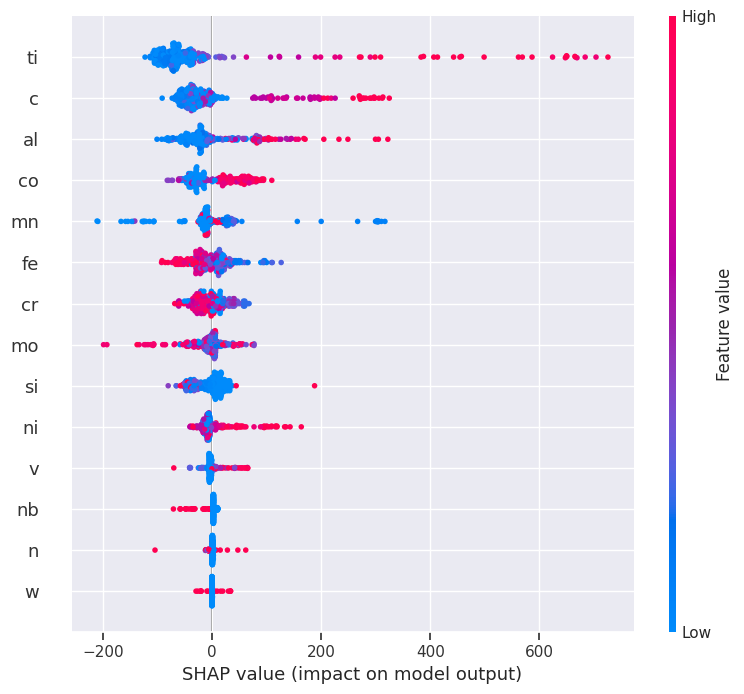

In [44]:
# Creating a SHAP
# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Visualize SHAP values
shap.summary_plot(shap_values, X)

In [43]:
# Define the parameter grid for SVR
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type: linear, polynomial, radial basis function
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Create an SVR model
svr_model = SVR()

# Create a GridSearchCV instance
grid_search_svr = GridSearchCV(svr_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV instance
grid_search_svr.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_svr.best_params_)
print("Best Score (Negative MSE):", grid_search_svr.best_score_)

# Make predictions on the test set using the best model from grid search
best_model_svr = grid_search_svr.best_estimator_
svr_predictions = best_model_svr.predict(X_test)

# Evaluate the best model
svr_mse = mean_squared_error(y_test, svr_predictions)
print("Grid Search CV Support Vector Regression Mean Squared Error (Test set):", svr_mse)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Best Score (Negative MSE): -39672.454757165215
Grid Search CV Support Vector Regression Mean Squared Error (Test set): 62701.19591106039


In [34]:
# creating a columns for the predictions and the percent error
steel["svr_ys_gs_preds"] = best_model_svr.predict(X)
steel["svr_ys_gs_preds_%"] = abs(100 * (steel["svr_ys_gs_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to 10%
good_ys_gs_preds_svr = steel["svr_ys_gs_preds_%"] <= 10

# Count the number of "Good" predictions
good_count_svr = good_ys_gs_preds_svr.value_counts()[True]

# Calculate the percentage of "Good" predictions
percentage_good_svr = (good_count_svr / len(steel["svr_ys_gs_preds_%"])) * 100

print("For Grid Search SVR, the percentage of Yield Strength Predictions within 10% of Actual value is:", percentage_good_svr)

For Grid Search SVR, the percentage of Yield Strength Predictions within 10% of Actual value is: 80.44871794871796


In [ ]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185 to Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0.0786Mo0.00284V0.000765Nb0.0000600Co0.0369Al0.000619
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   c                  312 non-null    float64
 1   mn                 312 non-null    float64
 2   si                 312 non-null    float64
 3   cr                 312 non-null    float64
 4   ni                 312 non-null    float64
 5   mo                 312 non-null    float64
 6   v                  312 non-null    float64
 7   n                  312 non-null    float64
 8   nb                 312 non-null    float64
 9   co                 312 non-null    float64
 10  w                  312 non-null    float64
 11  al                 312 non-null    float64
 12  ti                 312 non

In [ ]:
#creating a dataframe containing predictions
yield_strength_pred = steel[["yield strength", "rfr_ys_preds", "rfr_ys_preds_%", "nn_ys_preds", "nn_ys_preds_%", "rfr_ys_gs_preds", "rfr_ys_gs_preds_%",
                            "lr_ys_gs_preds", "lr_ys_gs_preds_%", "svr_ys_gs_preds", "svr_ys_gs_preds_%", "xgb_ys_preds", "xgb_ys_preds_%"]]
yield_strength_pred = yield_strength_pred.round(1)
yield_strength_pred.head()

,yield strength,rfr_ys_preds,rfr_ys_preds_%,nn_ys_preds,nn_ys_preds_%,rfr_ys_gs_preds,rfr_ys_gs_preds_%,lr_ys_gs_preds,lr_ys_gs_preds_%,svr_ys_gs_preds,svr_ys_gs_preds_%,xgb_ys_preds,xgb_ys_preds_%
formula,,,,,,,,,,,,,
Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185,2411.5,2367.9,1.8,1713.000000,29.0,2334.7,3.2,1951.5,19.1,2411.2,0.0,2411.100098,0.0
Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0.0000971Mo0.0179V0.00515N0.00163Nb0.0000614Co0.188W0.00729Al0.000845,1123.1,1202.3,7.1,1425.000000,26.9,1215.9,8.3,1487.1,32.4,1122.8,0.0,1123.300049,0.0
Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0.00480V0.000110Nb0.0000604Co0.132Al0.00812Ti0.00669,1736.3,1712.4,1.4,1537.500000,11.5,1706.8,1.7,1574.4,9.3,2052.0,18.2,1736.400024,0.0
Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111Ni0.173Mo0.0237V0.000113Nb0.0000619Co0.146Al0.00277Ti0.0176,2487.3,2406.0,3.3,1698.599976,31.7,2364.3,4.9,1874.7,24.6,2273.1,8.6,1959.900024,21.2
Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109Ni0.188Mo0.00860V0.000112Nb0.0000612Co0.144Al0.00274Ti0.0184,2249.6,2293.5,1.9,1732.400024,23.0,2254.1,0.2,1929.9,14.2,2377.4,5.7,2250.199951,0.0


In [ ]:
yield_strength_pred.isnull().sum()

yield strength       0
rfr_ys_preds         0
rfr_ys_preds_%       0
nn_ys_preds          0
nn_ys_preds_%        0
rfr_ys_gs_preds      0
rfr_ys_gs_preds_%    0
lr_ys_gs_preds       0
lr_ys_gs_preds_%     0
svr_ys_gs_preds      0
svr_ys_gs_preds_%    0
xgb_ys_preds         0
xgb_ys_preds_%       0
dtype: int64

In [ ]:
# Convert all columns to float with 1 decimal place
yield_strength_pred = yield_strength_pred.apply(lambda x: x.astype(float).round(1))
yield_strength_pred.head()

data_table.enable_dataframe_formatter()
yield_strength_pred

,yield strength,rfr_ys_preds,rfr_ys_preds_%,nn_ys_preds,nn_ys_preds_%,rfr_ys_gs_preds,rfr_ys_gs_preds_%,lr_ys_gs_preds,lr_ys_gs_preds_%,svr_ys_gs_preds,svr_ys_gs_preds_%,xgb_ys_preds,xgb_ys_preds_%
formula,,,,,,,,,,,,,
Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185,2411.5,2367.9,1.8,1713.0,29.0,2334.7,3.2,1951.5,19.1,2411.2,0.0,2411.1,0.0
Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0.0000971Mo0.0179V0.00515N0.00163Nb0.0000614Co0.188W0.00729Al0.000845,1123.1,1202.3,7.1,1425.0,26.9,1215.9,8.3,1487.1,32.4,1122.8,0.0,1123.3,0.0
Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0.00480V0.000110Nb0.0000604Co0.132Al0.00812Ti0.00669,1736.3,1712.4,1.4,1537.5,11.5,1706.8,1.7,1574.4,9.3,2052.0,18.2,1736.4,0.0
Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111Ni0.173Mo0.0237V0.000113Nb0.0000619Co0.146Al0.00277Ti0.0176,2487.3,2406.0,3.3,1698.6,31.7,2364.3,4.9,1874.7,24.6,2273.1,8.6,1959.9,21.2
Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109Ni0.188Mo0.00860V0.000112Nb0.0000612Co0.144Al0.00274Ti0.0184,2249.6,2293.5,1.9,1732.4,23.0,2254.1,0.2,1929.9,14.2,2377.4,5.7,2250.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0000949Mo0.0219V0.0105Nb0.0000600Co0.0463Al0.000620,1722.5,1700.0,1.3,1455.5,15.5,1652.1,4.1,1608.8,6.6,1718.4,0.2,1722.2,0.0
Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0.0189V0.000111Nb0.0000609Co0.0000961Al0.000629Ti0.00106,1019.0,1054.6,3.5,1416.9,39.1,1111.6,9.1,1060.7,4.1,1070.8,5.1,1018.8,0.0
Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0000963Mo0.0344V0.0116Nb0.00554Co0.0468Al0.000628,1860.3,1619.0,13.0,1455.6,21.8,1606.4,13.6,1118.0,39.9,1286.6,30.8,1688.1,9.3


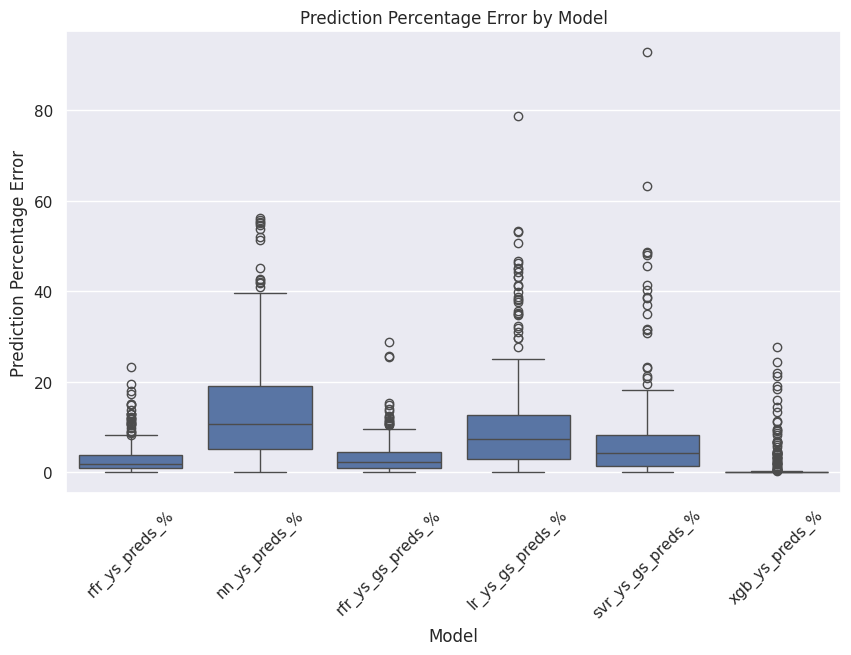

In [ ]:
# Extract prediction percentage error columns
prediction_percentages = yield_strength_pred.filter(like='_preds_%')

# Melt the DataFrame to long format for plotting
melted_data = prediction_percentages.melt(var_name='Model', value_name='Prediction Percentage Error')

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Prediction Percentage Error', data=melted_data)
plt.xticks(rotation=45)
plt.title('Prediction Percentage Error by Model')
plt.show()

In [ ]:
# Initialize a DataFrame to store the top 10 prediction errors for each model
top_10_errors = pd.DataFrame(index=yield_strength_pred.index)

# Loop through each prediction error column and extract the top 10 values
for column in yield_strength_pred.filter(like='_preds_%').columns:
    top_10_errors[f'top_10_{column}'] = yield_strength_pred[column].nlargest(len(yield_strength_pred.index)).values

# Display the new DataFrame containing the top 10 errors for each column
print(top_10_errors)

                                                    top_10_rfr_ys_preds_%  \
formula                                                                     
Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni...                   23.3   
Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0.0...                   19.6   
Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0.0...                   18.0   
Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111Ni...                   17.4   
Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109Ni...                   15.1   
...                                                                   ...   
Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.00...                    0.0   
Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0.0...                    0.0   
Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.00...                    0.0   
Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.00...                    0.0   
Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0.0...                    0.0   

In [ ]:
#Predicting the Tenslise Strentgh

#defining y
y_1 = steel["tensile strength"]


# Split the data into training and testing sets
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

# tring Random Forest Regression model base on litterature
# Train the Random Forest Regression model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_1_train)

# Make predictions on the test set
rfr_predictions = rfr_model.predict(X_test)

# Evaluate the model
ts_rfr_mse = mean_squared_error(y_1_test, rfr_predictions)
print("Random Forrest Regressor Mean Squared Error for Tensile Strength:", ts_rfr_mse)

Random Forrest Regressor Mean Squared Error for Tensile Strength: 11592.98069895233


In [ ]:

#creating a pd df ts_rfr_preds
ts_rfr_preds = pd.DataFrame()
ts_rfr_preds["tensile strength"] = steel["tensile strength"]

# adding a prediction column using X to the steel dataframe
ts_rfr_preds["ts_rfr_preds"] =rfr_model.predict(X)

# creating a column for the percentage of the relative error for each row
ts_rfr_preds["ts_rfr_preds_%"] = abs(100 * (ts_rfr_preds["ts_rfr_preds"] - ts_rfr_preds["tensile strength"]) / ts_rfr_preds["tensile strength"])

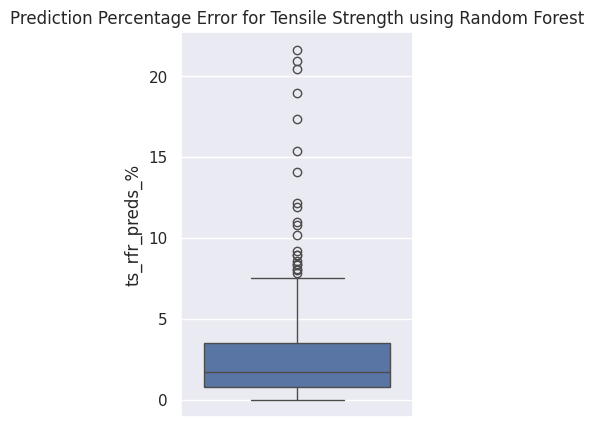

In [ ]:
# Create box plot
plt.figure(figsize=(3, 5))
sns.boxplot(y=ts_rfr_preds["ts_rfr_preds_%"])
plt.title('Prediction Percentage Error for Tensile Strength using Random Forest')
plt.show()

In [ ]:
# I am arbitrarily assigning any predictions that absolute error is less or equal then 10% to be "Good"
#% of Predictions Error for Tensile Strength using Random Forest less or equal to 10%
good_preds = ts_rfr_preds["ts_rfr_preds_%"] <= 10
bad_preds = ts_rfr_preds["ts_rfr_preds_%"] > 10
good_preds.value_counts()


ts_rfr_preds_%
True     300
False     12
Name: count, dtype: int64

In [ ]:
#Predicting Elongation
# since Elongation is missing 9 data point, I'll re-load the df and remove the missing values:
steel_1 = pd.read_csv("steel_strength.csv")
steel_1.dropna(inplace=True)

# Set the "formula" column as the index
steel_1.set_index("formula", inplace=True)
steel_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185 to Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0.0786Mo0.00284V0.000765Nb0.0000600Co0.0369Al0.000619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   c                 303 non-null    float64
 1   mn                303 non-null    float64
 2   si                303 non-null    float64
 3   cr                303 non-null    float64
 4   ni                303 non-null    float64
 5   mo                303 non-null    float64
 6   v                 303 non-null    float64
 7   n                 303 non-null    float64
 8   nb                303 non-null    float64
 9   co                303 non-null    float64
 10  w                 303 non-null    float64
 11  al                303 non-null    float64
 12  ti                303 non-null    float6

In [ ]:

# Fill NaN values with zeroes in specific columns
columns_to_fill = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']
steel_1[columns_to_fill] = steel_1[columns_to_fill].fillna(0)

#Creating a column for iron (fe)
# List of columns to subtract from 100
columns_to_subtract = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']

# Create the "fe" column by subtracting values from 100
steel_1["fe"] = 100 - steel_1[columns_to_subtract].sum(axis=1)

#seperating the features into X and target into y and scaling X
X = steel_1.drop(labels=["yield strength", "tensile strength", "elongation"], axis=1)

y_2 = steel_1["elongation"]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the features
X_scaled = scaler.fit_transform(X)

# Display the scaled DataFrame
X.head()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,fe
formula,,,,,,,,,,,,,,
Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,60.50
Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0.0000971Mo0.0179V0.00515N0.00163Nb0.0000614Co0.188W0.00729Al0.000845,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,60.98
Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111Ni0.173Mo0.0237V0.000113Nb0.0000619Co0.146Al0.00277Ti0.0176,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,61.61
Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109Ni0.188Mo0.00860V0.000112Nb0.0000612Co0.144Al0.00274Ti0.0184,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,62.43
Fe0.636C0.00881Mn0.000203Si0.00972Cr0.135Ni0.00892Mo0.0114V0.000109Nb0.0000600Co0.190Al0.000620,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00,63.69


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train_2, y_test_2 = train_test_split(X, y_2, test_size=0.2, random_state=42)

In [ ]:
# tring Random Forest Regression model base on litterature
# Train the Random Forest Regression model
elon_rfr_model = RandomForestRegressor()
elon_rfr_model.fit(X_train, y_train_2)

# Make predictions on the test set
elon_rfr_predictions = elon_rfr_model.predict(X_test)

# Evaluate the model
elon_rfr_mse = mean_squared_error(y_test_2, elon_rfr_predictions)
print("Random Forrest Regressor Mean Squared Error for Elongation:", elon_rfr_mse)

Random Forrest Regressor Mean Squared Error for Elongation: 17.181815016393454


In [ ]:
#creating a pd df ts_rfr_preds
elon_rfr_preds = pd.DataFrame()
elon_rfr_preds["elongation"] = steel_1["elongation"]

# adding a prediction column using X to the steel dataframe
elon_rfr_preds["elon_rfr_preds"] =elon_rfr_model.predict(X)

# creating a column for the percentage of the relative error for each row
elon_rfr_preds["elon_rfr_preds_%"] = abs(100 * (elon_rfr_preds["elon_rfr_preds"] - elon_rfr_preds["elongation"]) / elon_rfr_preds["elongation"])

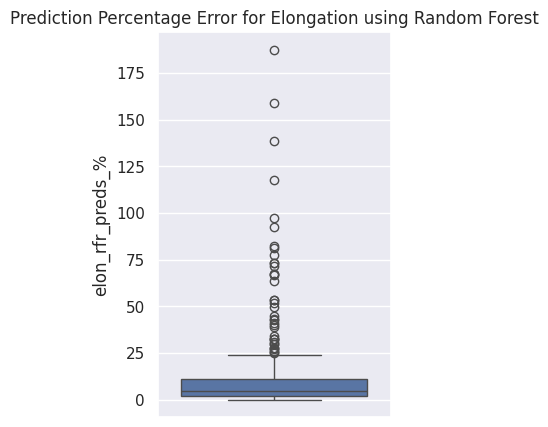

In [ ]:
# Create box plot for elongation error
plt.figure(figsize=(3, 5))
sns.boxplot(y=elon_rfr_preds["elon_rfr_preds_%"])
plt.title('Prediction Percentage Error for Elongation using Random Forest')
plt.show()

In [ ]:
# I am arbitrarily assigning any predictions that absolute error is less or equal then 10% to be "Good"
#% of Predictions Error for Tensile Strength using Random Forest less or equal to 10%
good_elon_preds = pd.DataFrame()
good_elon_preds = elon_rfr_preds["elon_rfr_preds_%"] <= 10
bad_elon_preds = elon_rfr_preds["elon_rfr_preds_%"] > 10
good_elon_preds.value_counts()

elon_rfr_preds_%
True     219
False     84
Name: count, dtype: int64